In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.insert(0, "../code-previous")
sys.path.insert(0, "..")

In [3]:
import pandas as pd
import numpy as np
import nltk
stopwords = nltk.corpus.stopwords.words('english')

from unicodedata import category
from tqdm import tqdm
tqdm.pandas(desc="Progress")

import seaborn as sns
sns.set()
import mutual_information
import matplotlib.pyplot as plt
path2rawdata = '/mnt/disks/vault/wos2017-parsed/'

In [4]:
raw_data_path = "/mnt/disks/vault/analysis-data/raw_data_full/raw_data_full.pql"
data = pd.read_pickle(raw_data_path)

data = data[data.Journal == "APPLIED PHYSICS LETTERS"]

In [5]:
len(data)

88295

In [6]:
# what is the average number of words per year
# New fields to dataframe 
data['log_c5'] = data['c5'].progress_apply(lambda x: np.log(x+1))
data['character_count'] = data['Title'].progress_apply(lambda x: len(x))
data["word_count"] = data["Title"].progress_apply(lambda x: len(x.split()))
data['title_without_punct'] = data['Title'].progress_apply(lambda x: 
                                                           str.lower(''.join(ch for ch in str(x) if category(ch)[0] != 'P')))
data["title_without_stopwords"] = data['title_without_punct'].progress_apply(lambda x: 
                                                                            " ".join([word for word in x.split() if word not in stopwords]))


data["word_count"] = data["Title"].progress_apply(lambda x: len(x.split()))
data["cleaned_title_word_count"] = data["title_without_stopwords"].progress_apply(lambda x: len(x.split()))

Progress: 100%|██████████| 88295/88295 [00:00<00:00, 556600.05it/s]


<Figure size 432x288 with 0 Axes>

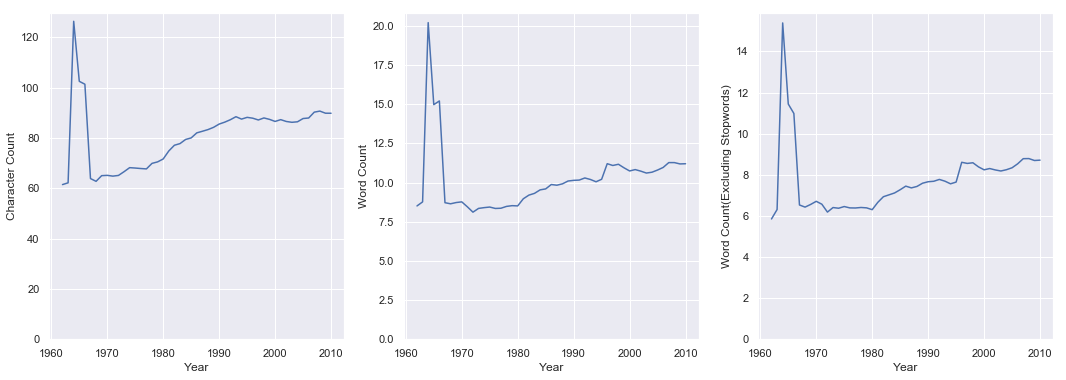

In [7]:
# Average character, word and cleaned title word counts over the years
f1 = plt.figure()
f1 = plt.figure(figsize=(18,6))


ax1 = f1.add_subplot(131)
average_character_count_groupedby_year = data.groupby('PubYear_x', as_index=False)['character_count'].mean()
ax1.plot(average_character_count_groupedby_year['PubYear_x'], 
         average_character_count_groupedby_year['character_count'])
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Year")
ax1.set_ylabel("Character Count")


average_word_count_groupedby_year = data.groupby('PubYear_x', as_index=False)["word_count"].mean()


ax2 = f1.add_subplot(132)
ax2.plot(average_word_count_groupedby_year['PubYear_x'], 
         average_word_count_groupedby_year['word_count'])
ax2.set_ylim(ymin=0)
ax2.set_xlabel("Year")
ax2.set_ylabel("Word Count")


ax3 = f1.add_subplot(133)
average_word_count_groupedby_year = data.groupby('PubYear_x', as_index=False)["cleaned_title_word_count"].mean()

ax3.plot(average_word_count_groupedby_year['PubYear_x'], 
         average_word_count_groupedby_year['cleaned_title_word_count'])
ax3.set_ylim(ymin=0)
ax3.set_xlabel("Year")
ax3.set_ylabel("Word Count(Excluding Stopwords)")


plt.show() 

In [8]:
# What is the variation of log citation counts over a period of 9 years -> from 2002 - 2010  with the variation in 
# word count
# Average character, word and cleaned title word counts over the years

def get_grouped_data_for_year(year):
    tmp = data[data.PubYear_x == year]
    tmp = tmp.groupby('word_count')['c5'].mean().reset_index(name="avg_c5")
    tmp['avg_log_c5'] = tmp['avg_c5'].apply(lambda x: np.log(x))
    return tmp
    
grouped_avgs = [get_grouped_data_for_year(year) for year in range(2002, 2011)]

<Figure size 432x288 with 0 Axes>

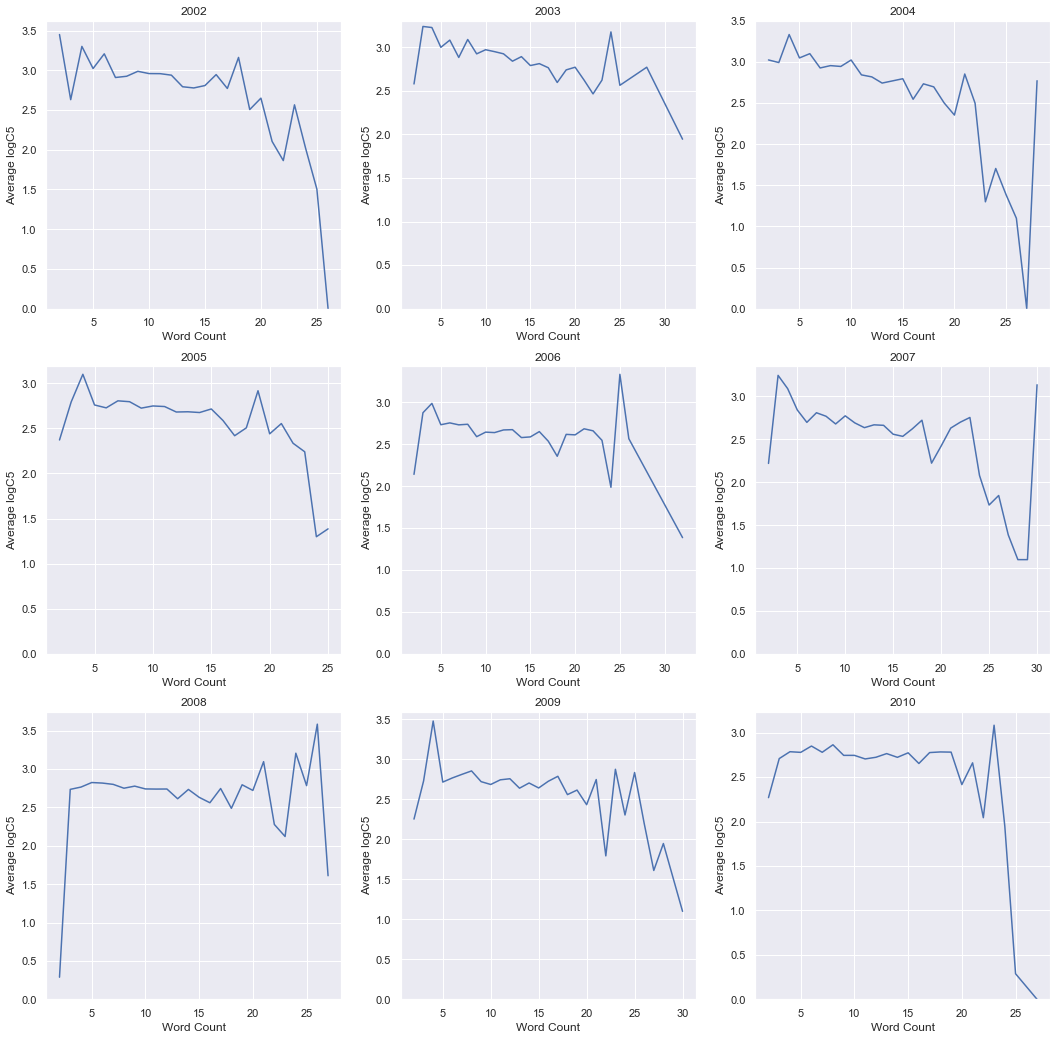

In [11]:
# Average character, word and cleaned title word counts over the years
f1 = plt.figure()
f1 = plt.figure(figsize=(18,18))


ax1 = f1.add_subplot(331)
ax1.plot(grouped_avgs[0]['word_count'], 
         grouped_avgs[0]['avg_log_c5'])
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Average logC5")
ax1.set_title("2002")

ax2 = f1.add_subplot(332)
ax2.plot(grouped_avgs[1]['word_count'], 
         grouped_avgs[1]['avg_log_c5']) 
ax2.set_ylim(ymin=0)
ax2.set_xlabel("Word Count")
ax2.set_ylabel("Average logC5")
ax2.set_title("2003")

         
ax3 = f1.add_subplot(333)
ax3.plot(grouped_avgs[2]['word_count'], 
         grouped_avgs[2]['avg_log_c5']) 
ax3.set_ylim(ymin=0)
ax3.set_xlabel("Word Count")
ax3.set_ylabel("Average logC5")   
ax3.set_title("2004")



ax4 = f1.add_subplot(334)
ax4.plot(grouped_avgs[3]['word_count'], 
         grouped_avgs[3]['avg_log_c5'])
ax4.set_ylim(ymin=0)
ax4.set_xlabel("Word Count")
ax4.set_ylabel("Average logC5")
ax4.set_title("2005")


ax5 = f1.add_subplot(335)
ax5.plot(grouped_avgs[4]['word_count'], 
         grouped_avgs[4]['avg_log_c5'])
ax5.set_ylim(ymin=0)
ax5.set_xlabel("Word Count")
ax5.set_ylabel("Average logC5")
ax5.set_title("2006")



ax6 = f1.add_subplot(336)
ax6.plot(grouped_avgs[5]['word_count'], 
         grouped_avgs[5]['avg_log_c5'])
ax6.set_ylim(ymin=0)
ax6.set_xlabel("Word Count")
ax6.set_ylabel("Average logC5")
ax6.set_title("2007")


ax7 = f1.add_subplot(337)
ax7.plot(grouped_avgs[6]['word_count'], 
         grouped_avgs[6]['avg_log_c5'])
ax7.set_ylim(ymin=0)
ax7.set_xlabel("Word Count")
ax7.set_ylabel("Average logC5")
ax7.set_title("2008")


ax8 = f1.add_subplot(338)
ax8.plot(grouped_avgs[7]['word_count'], 
         grouped_avgs[7]['avg_log_c5'])
ax8.set_ylim(ymin=0)
ax8.set_xlabel("Word Count")
ax8.set_ylabel("Average logC5")
ax8.set_title("2009")



ax9 = f1.add_subplot(339)
ax9.plot(grouped_avgs[8]['word_count'], 
          grouped_avgs[8]['avg_log_c5'])
ax9.set_ylim(ymin=0)
ax9.set_xlabel("Word Count")
ax9.set_ylabel("Average logC5")
ax9.set_title("2010")




plt.show() 